In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
train=pd.read_csv(r"C:\Users\Admin\Downloads\train.csv\train.csv")
test=pd.read_csv(r"C:\Users\Admin\Downloads\test.csv")

In [29]:
train.head(5)

,id,N_Days,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage,Status
0,0,1084.0,17664.0,F,N,0.5,3.65,316.0,10.0,2.0,C
1,1,790.0,23376.0,F,N,8.4,3.15,298.0,13.6,4.0,D
2,2,1367.0,13149.0,F,N,0.6,3.03,402.0,11.4,1.0,C
3,3,2721.0,17809.0,F,N,0.9,3.80,327.0,9.5,2.0,C
4,4,989.0,12369.0,F,N,1.8,3.58,244.0,10.4,3.0,C


In [4]:
train.isnull().sum()

id                  0
N_Days              0
Drug             6608
Age                 0
Sex                 0
Ascites          6603
Hepatomegaly     6607
Spiders          6606
Edema               0
Bilirubin           0
Cholesterol      8409
Albumin             0
Copper           6699
Alk_Phos         6610
SGOT             6612
Tryglicerides    8458
Platelets         535
Prothrombin        28
Stage               0
Status              0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8392 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8397 non-null   object 
 6   Hepatomegaly   8393 non-null   object 
 7   Spiders        8394 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6591 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8301 non-null   float64
 13  Alk_Phos       8390 non-null   float64
 14  SGOT           8388 non-null   float64
 15  Tryglicerides  6542 non-null   float64
 16  Platelets      14465 non-null  float64
 17  Prothrombin    14972 non-null  float64
 18  Stage 

In [6]:
test=test.drop(columns='Cholesterol',axis=1)

In [7]:
test.head(4)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,2157.0,Placebo,21281.0,F,N,N,N,N,0.7,3.64,27.0,637.0,106.95,68.0,201.0,10.6,1.0
1,15001,348.0,D-penicillamine,19817.0,F,N,Y,Y,N,2.3,3.06,225.0,944.0,120.90,75.0,102.0,12.3,3.0
2,15002,131.0,D-penicillamine,16154.0,F,N,Y,Y,N,6.5,3.40,88.0,2374.0,193.00,133.0,354.0,11.8,4.0
3,15003,1141.0,NaN,21532.0,F,NaN,NaN,NaN,N,0.6,4.19,NaN,NaN,NaN,NaN,181.0,10.9,2.0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   N_Days         10000 non-null  float64
 2   Drug           5631 non-null   object 
 3   Age            10000 non-null  float64
 4   Sex            10000 non-null  object 
 5   Ascites        5633 non-null   object 
 6   Hepatomegaly   5627 non-null   object 
 7   Spiders        5627 non-null   object 
 8   Edema          10000 non-null  object 
 9   Bilirubin      10000 non-null  float64
 10  Albumin        10000 non-null  float64
 11  Copper         5559 non-null   float64
 12  Alk_Phos       5624 non-null   float64
 13  SGOT           5623 non-null   float64
 14  Tryglicerides  4299 non-null   float64
 15  Platelets      9611 non-null   float64
 16  Prothrombin    9986 non-null   float64
 17  Stage          10000 non-null  float64
dtypes: floa

In [9]:
test.isnull().sum()

id                  0
N_Days              0
Drug             4369
Age                 0
Sex                 0
Ascites          4367
Hepatomegaly     4373
Spiders          4373
Edema               0
Bilirubin           0
Albumin             0
Copper           4441
Alk_Phos         4376
SGOT             4377
Tryglicerides    5701
Platelets         389
Prothrombin        14
Stage               0
dtype: int64

In [10]:
train=train.drop(columns='Tryglicerides',axis=1)

In [11]:
train=train.drop(columns='Cholesterol',axis=1)

In [12]:
test=test.drop(columns='Tryglicerides',axis=1)

In [14]:
test['Prothrombin']=test['Prothrombin'].fillna(test['Prothrombin'].mode()[0])
test['Platelets']=test['Platelets'].fillna(test['Platelets'].mode()[0])

In [15]:
train['Prothrombin']=train['Prothrombin'].fillna(train['Prothrombin'].mode()[0])
train['Platelets']=train['Platelets'].fillna(train['Platelets'].mode()[0])

In [22]:
train=train.dropna(axis=1)

In [23]:
test=test.dropna(axis=1)

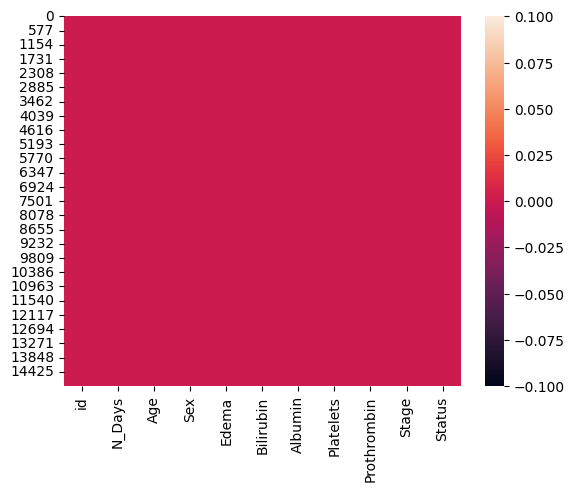

In [24]:
sns.heatmap(train.isnull())
plt.show()

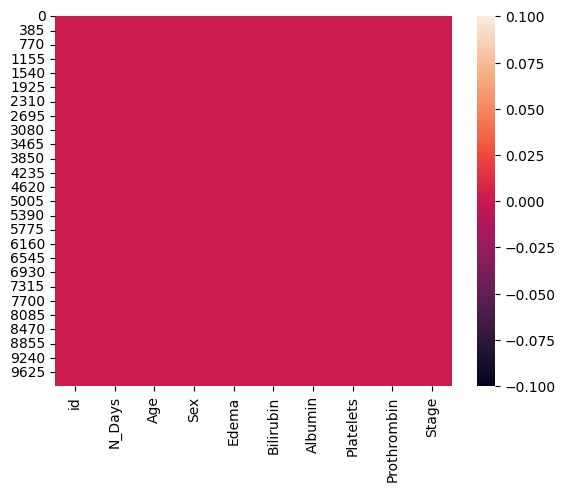

In [25]:
sns.heatmap(test.isnull())
plt.show()

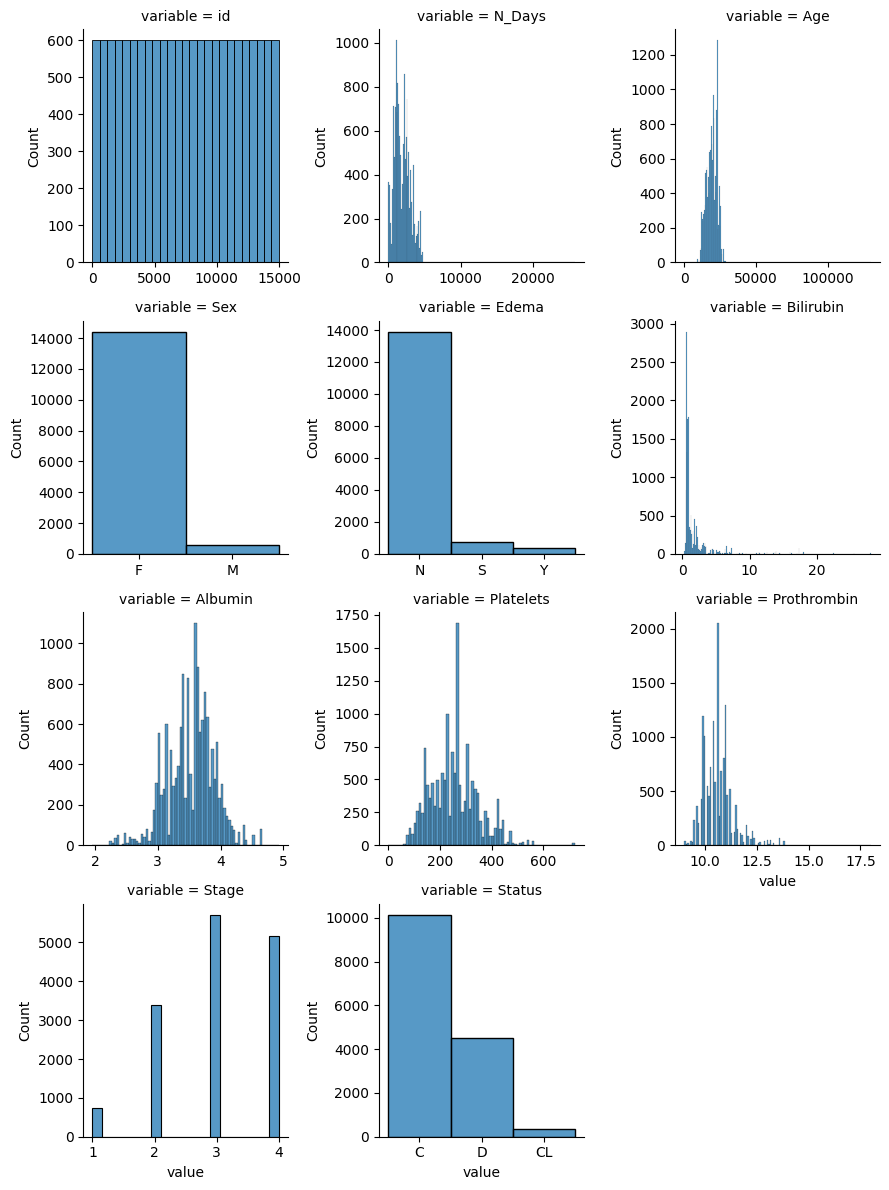

In [26]:
p=sns.FacetGrid(train.melt(),col='variable',col_wrap=3,sharex=False,sharey=False)
p.map(sns.histplot,"value")
plt.show()

<Axes: >

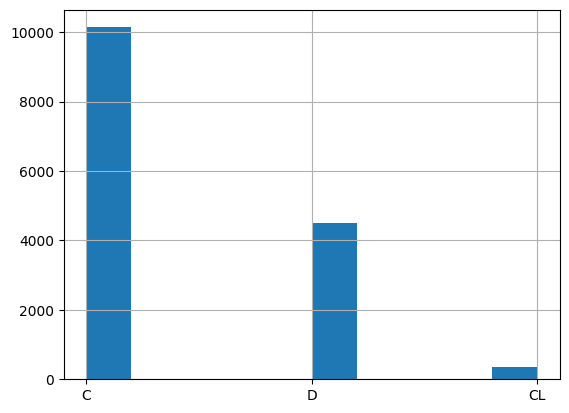

In [27]:
train['Status'].hist()

In [56]:
#categorical_columns=['Sex','Edema']
lb=LabelEncoder()
train['Edema']=lb.fit_transform(train['Edema'])
train['Status']=lb.fit_transform(train['Status'])
train['Sex']=lb.fit_transform(train['Sex'])

In [33]:
#categorical_columns=['Sex','Edema']
lb=LabelEncoder()
test['Edema']=lb.fit_transform(test['Edema'])
test['Sex']=lb.fit_transform(test['Sex'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_4388\3285527382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Edema']=lb.fit_transform(test['Edema'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4388\3285527382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sex']=lb.fit_transform(test['Sex'])


In [34]:
train['Sex'].head(4)  #after encoding

0    0
1    0
2    0
3    0
Name: Sex, dtype: int64

In [35]:
train['Sex'].value_counts()  #after encoding

Sex
0    14410
1      590
Name: count, dtype: int64

In [42]:
St=StandardScaler()    #Bilirubin	Albumin	Platelets	Prothrombin	Stage
train['Age']=St.fit_transform(train[['Age']])
train['N_Days']=St.fit_transform(train[['N_Days']])
train['Albumin']=St.fit_transform(train[['Albumin']])
train['Platelets']=St.fit_transform(train[['Platelets']])

In [43]:
test.loc[:, 'Age'] = St.fit_transform(test[['Age']])        #setting copy 
test.loc[:, 'N_Days'] = St.fit_transform(test[['N_Days']])   #to avoid
test.loc[:, 'Albumin'] = St.fit_transform(test[['Albumin']])   # this error
test.loc[:, 'Platelets'] = St.fit_transform(test[['Platelets']])

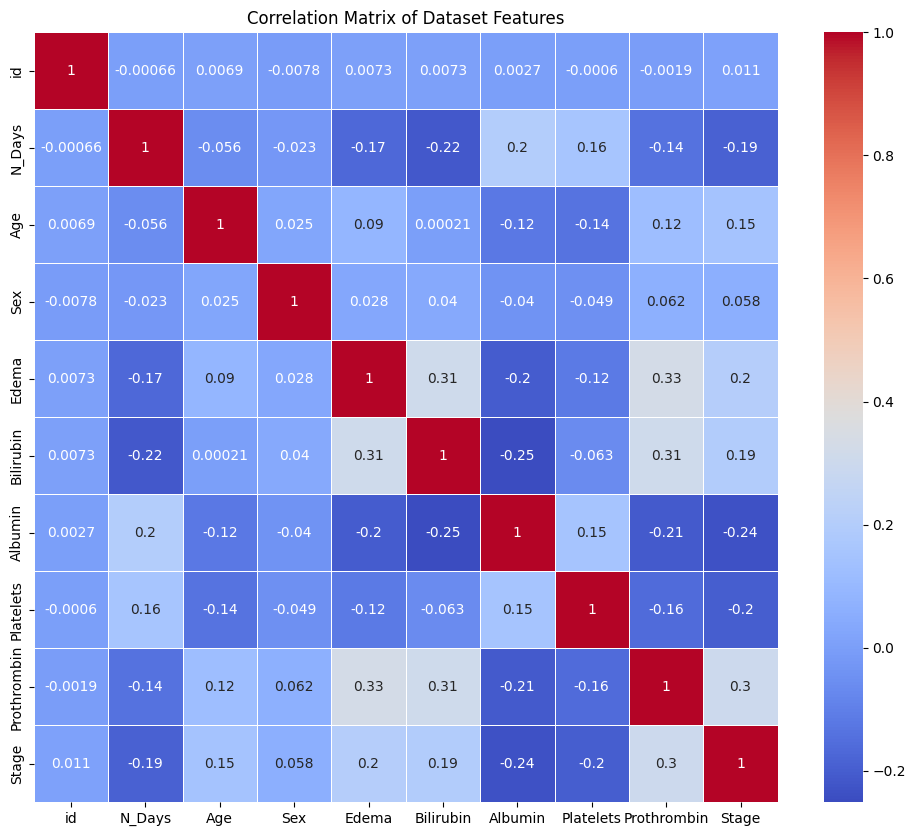

In [45]:
columns = train.select_dtypes(include=['float64', 'int64']).columns
corr = train[columns].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', linewidths=0.5)
ax.set_title('Correlation Matrix of Dataset Features')
plt.show()

In [61]:
#encountered error (inconsistent number ofsamples)
X = train.drop(columns=['id', 'Status'])
y = train['Status']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# Encode categorical columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded_cats = pd.DataFrame(onehot_encoder.fit_transform(X[categorical_cols]), index=X.index)

# Scale numerical columns
scaler = StandardScaler()
X_scaled_nums = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), index=X.index)
X_preprocessed = pd.concat([X_scaled_nums, X_encoded_cats], axis=1)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_valid, y_train, y_valid = train_test_split(X_preprocessed, y_encoded, test_size=0.2, random_state=42)

C:\Users\Admin\ANACONDA\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
rf_pred = model.predict(X_valid)
print(rf_pred)

[2 0 2 ... 2 0 0]


In [71]:
acc=accuracy_score(y_valid,rf_pred)
print(acc)

0.8353333333333334


In [73]:
model2=DecisionTreeClassifier()
model2.fit(X_train, y_train)
dc_pred = model2.predict(X_valid)
acc2=accuracy_score(dc_pred, y_valid)
print(acc2)

0.7496666666666667


In [75]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
mod_kn=kn.fit(X_train,y_train)
kn_pred=mod_kn.predict(X_valid)
acc_kn=accuracy_score(y_valid,kn_pred)
print(acc_kn)

0.8026666666666666


In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
mod_lr=lr.fit(X_train,y_train)
lr_pred=mod_lr.predict(X_valid)
acc_lr=accuracy_score(y_valid,lr_pred)
print(acc_lr)

0.8106666666666666


In [81]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train)
nb_pred = model3.predict(X_valid)
acc_nb=accuracy_score(nb_pred,y_valid)
print(acc_nb)

0.7523333333333333


In [82]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)
svm_pred = classifier.predict(X_valid)
acc_svm=accuracy_score(svm_pred,y_valid)
print(acc_svm)

0.8106666666666666



Best model:RandomForestClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      2010
           1       0.58      0.10      0.18        67
           2       0.79      0.70      0.74       923

    accuracy                           0.84      3000
   macro avg       0.74      0.57      0.60      3000
weighted avg       0.83      0.84      0.83      3000



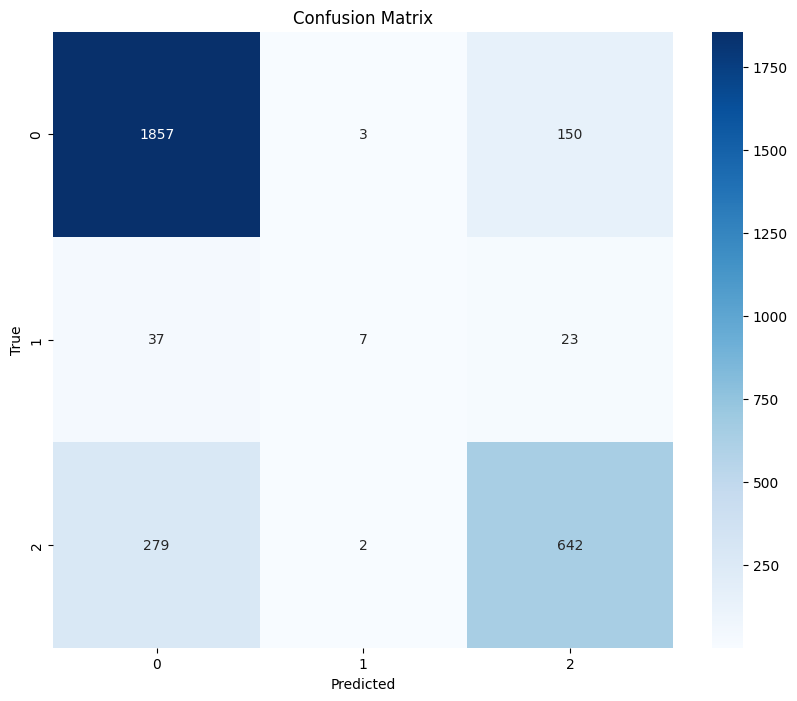

In [105]:
from sklearn.metrics import classification_report
print('\nBest model:RandomForestClassifier')
print('\nClassification Report:')
print(classification_report(y_valid, rf_pred))

conf_matrix = confusion_matrix(y_valid, rf_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()


In [84]:
print(rf_pred)

[2 0 2 ... 2 0 0]


In [86]:
np.set_printoptions(threshold=np.inf)
print("Predicted labels:", rf_pred)


Predicted labels: [2 0 2 2 0 2 2 0 0 0 0 0 2 2 2 0 2 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2
 2 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 2 2 0 0 0 0 2 2 2 0 0 0 2 0 2 2 0 0 2 0
 0 2 2 2 0 2 2 0 0 0 0 0 0 2 0 2 2 0 0 2 2 0 0 0 0 0 2 0 2 0 0 0 2 2 0 2 2
 0 0 2 0 0 0 2 2 1 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 2 0 0 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 2 2 2 0 2 0 0 2 0 0 0 0 0 0 0 0 2 2 2 0 0
 0 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 2 2 0 0 2 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0
 2 0 0 0 2 0 0 2 0 0 2 0 0 0 2 2 2 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0
 0 0 0 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 2 2 0 0 0 0 0 2 0 2 0 2 0 0 2
 2 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 2 0 0 2 2 2 2 2
 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 2 0 0 2 0 0 0 2 0 0 0 0 0 2 0 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 2 2 0 0 2 0 2 2 0 0 0 0 0 2 0 2 0 2
 2 0 2 0 2 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 2 0 2 0 0 0 2 2 2 0 2 2 0 0 2 0 2
 0 2 0 

In [87]:
X_test=test.copy()

In [88]:
X_test.head(5)

,id,N_Days,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
0,15000,0.132666,0.524513,0,0,0.7,0.322469,-0.559568,10.6,1.0
1,15001,-1.224456,0.140449,0,0,2.3,-1.204920,-1.588531,12.3,3.0
2,15002,-1.387251,-0.820498,0,0,6.5,-0.309554,1.030646,11.8,4.0
3,15003,-0.629543,0.590360,0,0,0.6,1.770855,-0.767440,10.9,2.0
4,15004,-0.540268,0.978359,0,0,0.9,0.770152,1.207337,10.5,4.0


In [98]:
X_test_1=X_test.drop(columns='id',axis=1)
y_test=X_test['id']

In [99]:
test_probabilities = model.predict_proba(X_test_1)  #

C:\Users\Admin\ANACONDA\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [103]:
label_encoder.fit(['C', 'CL', 'D'])       # to create submission file
idx_C = label_encoder.transform(['C'])[0]
idx_CL = label_encoder.transform(['CL'])[0]
idx_D = label_encoder.transform(['D'])[0]

submission = pd.DataFrame({
    'id': y_test,
    'Status_C': test_probabilities[:, idx_C],
    'Status_CL': test_probabilities[:, idx_CL],
    'Status_D': test_probabilities[:, idx_D]
})


In [104]:
print(submission)

         id  Status_C  Status_CL  Status_D
0     15000      0.11       0.00      0.89
1     15001      0.01       0.00      0.99
2     15002      0.04       0.00      0.96
3     15003      0.15       0.01      0.84
4     15004      0.16       0.04      0.80
...     ...       ...        ...       ...
9995  24995      0.13       0.02      0.85
9996  24996      0.04       0.01      0.95
9997  24997      0.05       0.00      0.95
9998  24998      0.27       0.02      0.71
9999  24999      0.01       0.01      0.98

[10000 rows x 4 columns]
